### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

@ Import Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
%matplotlib inline
# pdist weigh to capture distance within cluster
# cdist weigh to capture distance between cluster

In [82]:
data = pd.read_csv('vehicle.csv') 
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [83]:
data.shape

(846, 19)

In [84]:
data.dropna(inplace = True)
data.shape

(813, 19)

In [85]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### 2. Print/ Plot the dependent (categorical variable) - Class column

In [86]:
data['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

Text(0.5, 1.0, 'Count of  class')

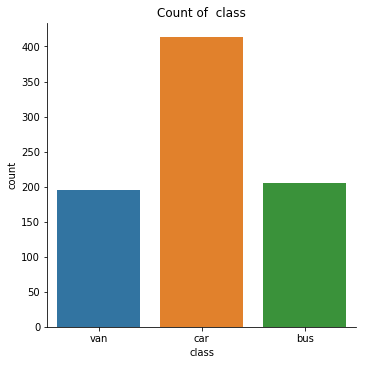

In [87]:
sns.catplot(x="class", kind="count",data=data)
plt.title("Count of  class")

Since the variable is categorical, you can use value_counts function

### Check for any missing values in the data 

In [88]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [89]:
X = data.drop('class' , axis = 1)

In [90]:
X.shape

(813, 18)

In [91]:
from scipy.stats import zscore
X= X.apply(zscore)
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [92]:
from sklearn.cluster import KMeans

# Let us check optimal number of clusters-
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [93]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:17]

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5739.201327
4,5,5188.911341
5,6,4718.162745
6,7,4356.757083
7,8,4084.596729
8,9,3869.188927


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

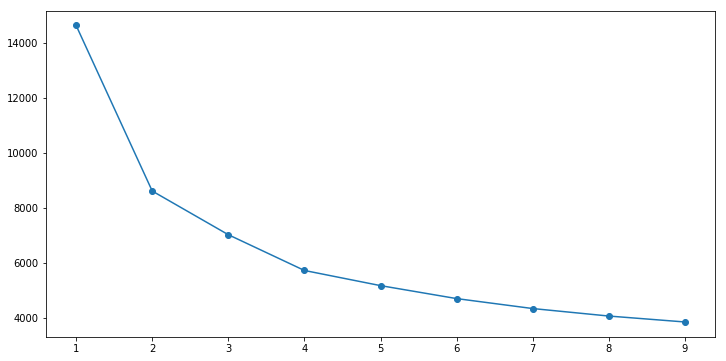

In [94]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

Optimal value of K = 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [95]:
# Number of clusters

kmeans = KMeans(n_clusters=4)

# Fitting the input data

kmeans = kmeans.fit(X)

# Getting the cluster labels

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [96]:
# Centroid values

centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids

print("Centroid values")

print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.9216121  -0.50993467 -0.86684966 -1.06000569 -0.53752344 -0.31686686
  -0.76754223  0.84220223 -0.73721553 -0.48721196 -0.78267083 -0.77222359
  -0.37892796  0.7539109  -0.10127686 -0.30990589 -1.02312279 -1.07776413]
 [-0.33146652 -0.87975186 -0.5416126  -0.25188592  0.06691349 -0.21783124
  -0.69712389  0.61018101 -0.71206734 -0.80154884 -0.66705633 -0.67252806
  -0.93014768 -0.77612597 -0.13210739  0.04860587  1.0324067   0.87126324]
 [ 0.11705071  0.083045    0.25213078  0.64856217  0.71933867  0.43663978
   0.11664974 -0.31402258  0.06283029  0.05299777  0.27618933  0.06263211
   0.06812213 -0.15611819  0.02877937 -0.00906917  0.46844867  0.41527017]
 [ 1.25474585  1.31131529  1.29070636  0.97420313  0.0505986   0.25380761
   1.41255004 -1.28262193  1.42885758  1.23566734  1.29308575  1.4325696
   1.21994154 -0.03822562  0.21349071  0.31038019 -0.10500284  0.13849008]]


### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [97]:
newdf = pd.DataFrame(centroids, columns=X.columns)
newdf.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.921612,-0.509935,-0.866850,-1.060006,-0.537523,-0.316867,-0.767542,0.842202,-0.737216,-0.487212,-0.782671,-0.772224,-0.378928,0.753911,-0.101277,-0.309906,-1.023123,-1.077764
1,-0.331467,-0.879752,-0.541613,-0.251886,0.066913,-0.217831,-0.697124,0.610181,-0.712067,-0.801549,-0.667056,-0.672528,-0.930148,-0.776126,-0.132107,0.048606,1.032407,0.871263
2,0.117051,0.083045,0.252131,0.648562,0.719339,0.436640,0.116650,-0.314023,0.062830,0.052998,0.276189,0.062632,0.068122,-0.156118,0.028779,-0.009069,0.468449,0.415270
3,1.254746,1.311315,1.290706,0.974203,0.050599,0.253808,1.412550,-1.282622,1.428858,1.235667,1.293086,1.432570,1.219942,-0.038226,0.213491,0.310380,-0.105003,0.138490


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [101]:
X['labels'] = kmeans.labels_
X.groupby(["labels"]).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
labels,,,,,,,,,,,,,,,,,,
0,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246
1,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
2,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
3,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [105]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [111]:
concatenate = np.concatenate([a,b,c])
data=pd.DataFrame(concatenate, columns=['x', 'y'])
data.head(5)

,x,y
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203E580E240>,
      dtype=object)

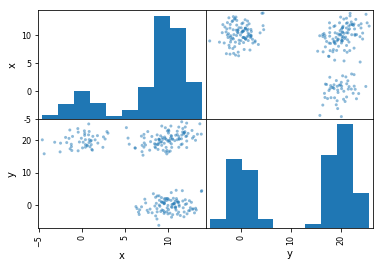

In [114]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [119]:
# Case 1: Ward Method
Z = linkage(data, 'ward',metric='euclidean')
c, coph_dists = cophenet(Z , pdist(data))
print("Ward",c)

Ward 0.9536963071171022


### 12. Plot the dendrogram for the consolidated dataframe

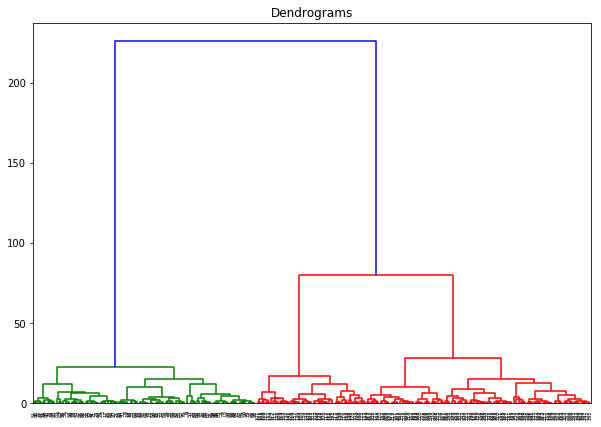

In [121]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(Z)

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

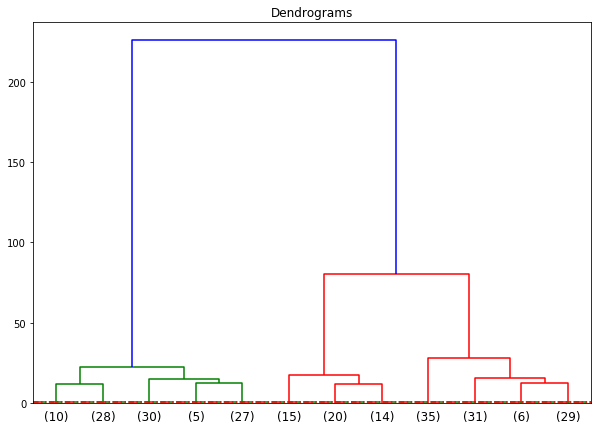

In [128]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(Z, truncate_mode='lastp', p=12)
plt.axhline(y=0.6, color='g', linestyle='--')
plt.axhline(y=0.7, color='r', linestyle='-.')

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 

In [129]:
pwd

'D:\\testlab'